In [302]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline


In [4]:
#UCI datasets do not have a header but it is described in the dataset description page, and can be downloaded as a .name file
# we will enter the headers manually
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
#Create a dataframe containing the data.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#replace missing values '?' with 'NaN'
df.replace('?', np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#detect missing data
missing_data = df.isnull()
missing_data.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [7]:
#make a count of missing data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [8]:
#We find the mean of the normalized losses column and replace missing values with that in df
norm_losses_mean = df['normalized-losses'].astype(float).mean()

In [9]:
df['normalized-losses'].replace(np.nan, norm_losses_mean, inplace=True)

In [10]:
#We find the mean of the bore column and replace missing values with that in df
bore_mean = df['bore'].astype('float').mean()

In [11]:
df['bore'].replace(np.nan, bore_mean, inplace=True)

In [12]:
##We find the mean of the stroke column and replace missing values with that in df
stroke_mean = df['stroke'].astype(float).mean()
df['stroke'].replace(np.nan, bore_mean, inplace = True)

In [13]:
##We find the mean of the horsepower column and replace missing values with that in df
hsp_mean = df['horsepower'].astype(float).mean()
df['horsepower'].replace(np.nan, hsp_mean, inplace=True)

In [14]:
##We find the mean of the peak-rpm column and replace missing values with that in df
peakrpm_mean = df['peak-rpm'].astype(float).mean()
df['peak-rpm'].replace(np.nan, peakrpm_mean, inplace = True)

In [15]:
#.valuecounts method shows how many values of each type there are
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [16]:
#,idmax(d method shows which is the mode of the categoriacal values
df['num-of-doors'].value_counts().idxmax()

'four'

In [17]:
#we use the .value_counts and .idmax() methods to replace missing categorical data
df['num-of-doors'].replace(np.nan, (df['num-of-doors'].value_counts().idxmax()), inplace = True)

In [18]:
#and we drop rows that do not have proce data
df.dropna(subset = ['price'], axis =0, inplace = True)

In [19]:
#Finally reset the index because we have dropped rows
df.reset_index(drop = True, inplace = True)

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Formatting

In [21]:
#we use .dtypes attribute to see what type is contained in each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [22]:
#we use .astype method to change data type
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [23]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization
This invlolves converting data into a common format to make meaningful comparison

In [24]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [25]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data 
df.head()# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


### Binning

In [26]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)


Text(0.5, 1.0, 'horsepower bins')

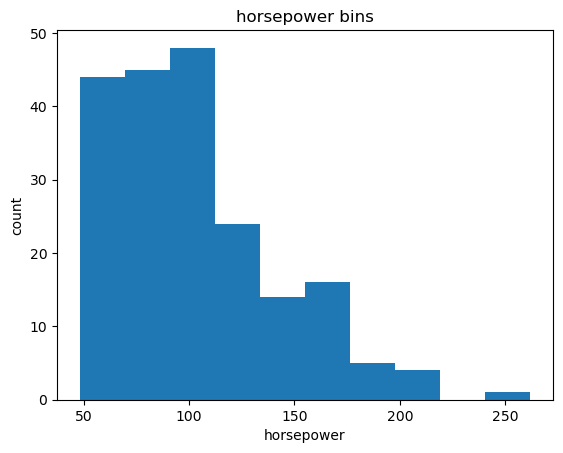

In [27]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [28]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [29]:
group_names = ['Low', 'Medium', 'High']

In [30]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [31]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

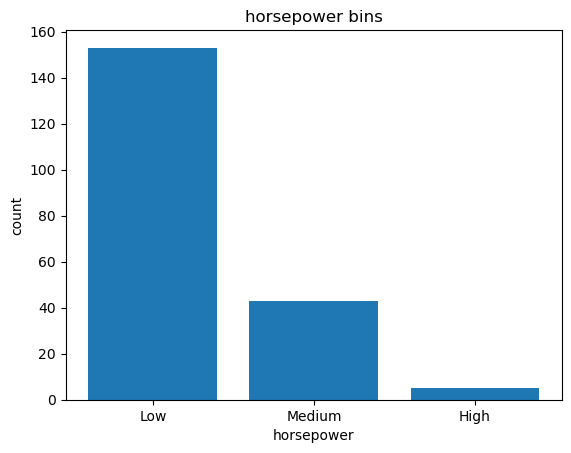

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

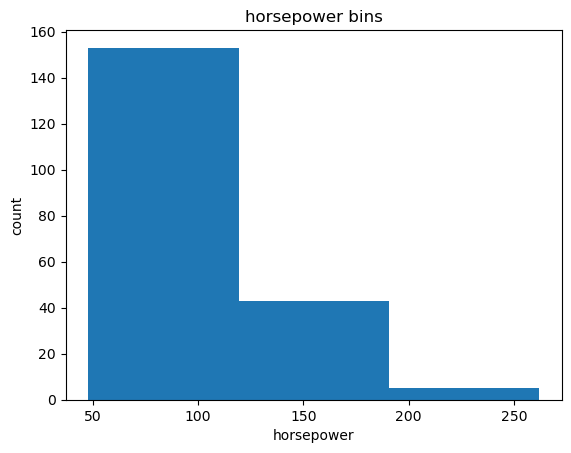

In [33]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Dummy Variable / indicator variable
It is useful when we need to work with categorical data

In [34]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [35]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [36]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [37]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df['aspiration'].value_counts()

In [ ]:
#Create dummies for aspiration
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns ={'std':'std aspiration', 'turbo':'turbo aspiration'}, inplace = True)
dummy_variable_2.head()

In [ ]:
df = pd.concat([df, dummy_variable_2], axis = 1)
df.drop('fuel-type', axis = 1, inplace = True)
df.head()

In [ ]:
df.to_csv('clean_df.csv')

## Exploratory Data Anaalysis
The goal of this stage is to understand our data better. The question we seek to answer is which variables are important in determining the price. We will stastitical techniques to determine these variables: Visualisation, Pearson Correlation, and Analysis of Variance. 
For visualisation, we will use scatter plots with a line of regression to visualize continuous numerical variables, and box plots to visualize discreete categorical variables. For the scatter plot with a regression line, we will pick the variables that have a strong positive linear relationship or negative linear relationship . For boxplots, we pick the variables whose boxplots do not overlap.
The Pearson Correlation method is used to measure linear dependence between two continuous numerical variables. We will choose variables with a p-value < 0.05, and correlation coefficient > 0.2 or < -0.2.
In the ANOVA analysis, we choose variables with f-test value > 5, and p-value < 0.05.

### Analyzing Individual feature patterns unsing visualization

In [39]:
#undersand what type of variables you are dealing with
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel         bool
fuel-type-gas            bool
dtype: object

In [43]:
df['peak-rpm'].dtype

dtype('float64')

In [47]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055377,0.001263,0.566903
stroke,-0.055377,1.000000,0.186877,0.098844
compression-ratio,0.001263,0.186877,1.000000,-0.214489
horsepower,0.566903,0.098844,-0.214489,1.000000


### Correlation between continuous numerical variables
We start with the sns regplot which is a scatterplot with a regression line.

#### Engine size and Price

(0.0, 53170.14175445249)

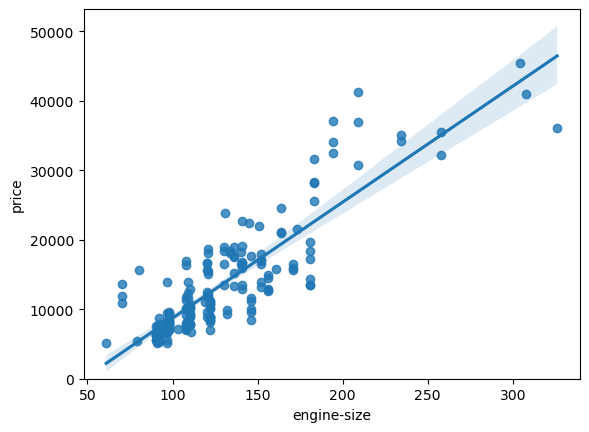

In [49]:
sns.regplot(x='engine-size', y='price', data = df)
plt.ylim(0,)

In [51]:
#using the correlation test:
df[['engine-size', 'price']].corr()

#Strong positive correlation from both the graphical representation and the correlation test

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### Highway-mpg and price


(0.0, 48165.202013349124)

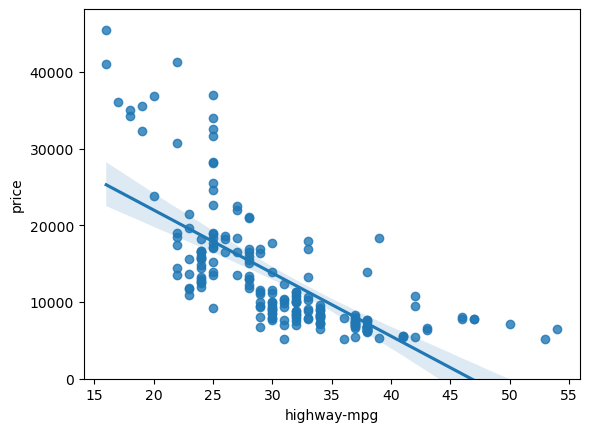

In [52]:
#test correlation between high miles per gallon and price
sns.regplot(x='highway-mpg', y='price', data = df)
plt.ylim(0,)


In [53]:
#Using the .corr method
df[['highway-mpg', 'price']].corr()

#Strong negative relationshp means that highway-mpg is a good predictor of price

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### peak-rpm and price

(0.0, 47414.1)

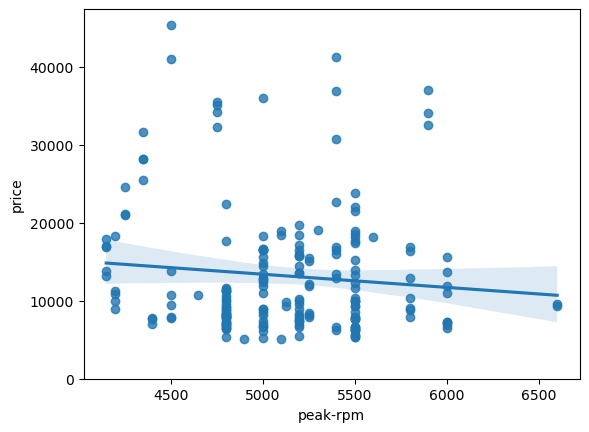

In [54]:
#test correlaition between peak-rpm and price
sns.regplot(x='peak-rpm', y='price', data = df)
plt.ylim(0,)

In [55]:
#using the .corr method
df[['peak-rpm', 'price']].corr()
#weak relationship means that peak-rpm is not a good predictor of price

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


(0.0, 47414.1)

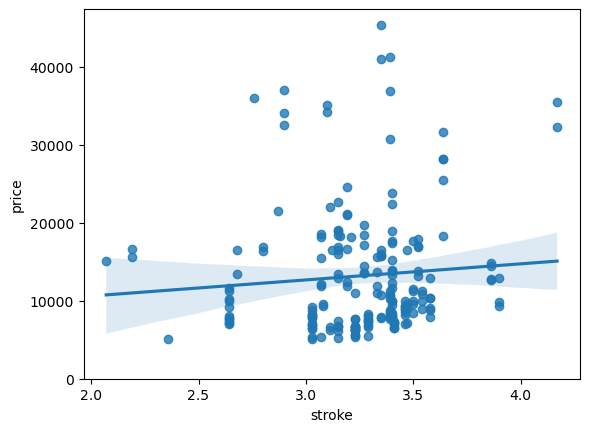

In [56]:
#visualising the relationship between stroke and price
sns.regplot(x='stroke', y='price', data = df)
plt.ylim(0,)

In [57]:
#using the .corr method
df[['stroke', 'price']].corr()
#weak positive relationship

,stroke,price
stroke,1.000000,0.082116
price,0.082116,1.000000


### Visualizing categorical data to understand correlation
Categorical data has types 'object' or 'int64'. We will use boxplots to visualize

<Axes: xlabel='body-style', ylabel='price'>

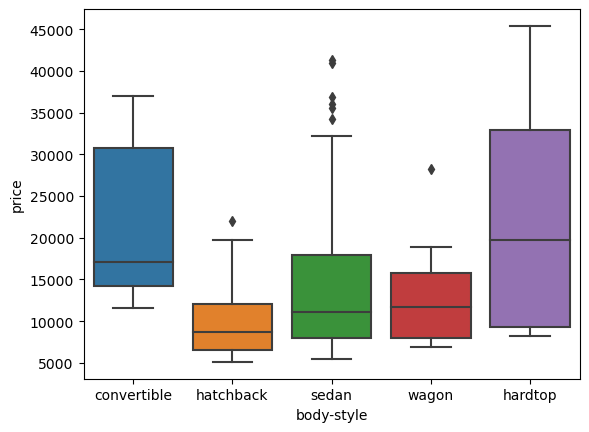

In [59]:
#relationship between bodystyle and price
sns.boxplot(x='body-style', y='price', data =df)

#alot of overlap implies that body-style is not a good predictor of price

<Axes: xlabel='engine-location', ylabel='price'>

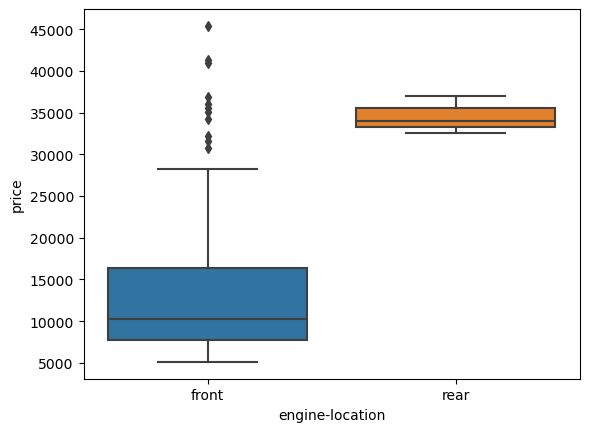

In [61]:
#Next we examine engine-location and pric
sns.boxplot(x='engine-location', y='price', data = df)
#a significant difference shows that engine location is a good predictor of price

<Axes: xlabel='drive-wheels', ylabel='price'>

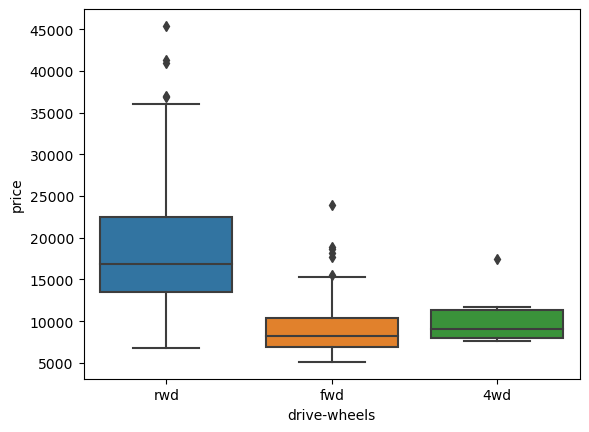

In [63]:
#we shall also ecamine drivev-wheels and price
sns.boxplot(x='drive-wheels', y='price', data = df)
#rwd is clelarly different, but fwd and fwd have a strong overlap

### Descriptive Statistical Analysis

In [64]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.258353,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316212,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [65]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,165,115,94,118,198,145,157,92


In [66]:
#pandas value_count shows how many units of each variable we have but works only on series
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [67]:
#we can convert to dataframe using the to.frame emthod
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [72]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [73]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [74]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


### Basics of Grouping
Data is grouped using the groupby() method baseed on one or several variables and analysis is prformed on individual groups

In [78]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
...,...,...
196,rwd,16845.0
197,rwd,19045.0
198,rwd,21485.0
199,rwd,22470.0


In [92]:
# grouping results
df_group_one = df[['drive-wheels','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [89]:
    # grouping results
    df_gptest = df[['drive-wheels','body-style','price']]
    grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
    grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [93]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [94]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [95]:
# grouping results
df_group_two = df[['body-style','price']]
df_group_two = df_group_two.groupby(['body-style'],as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


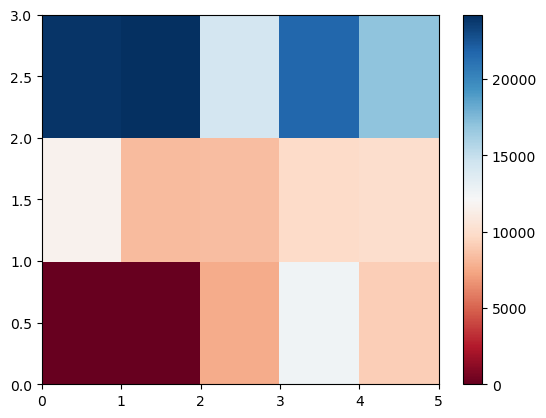

In [96]:
#using a heatplot to visualize relationship btn body-style and price
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

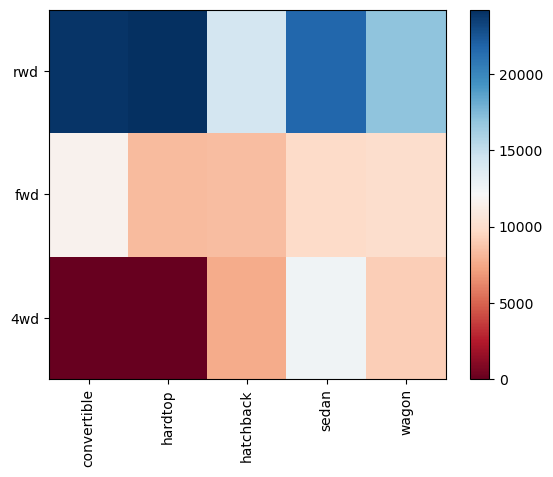

In [97]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

###  Pearson Correlation
This is the default correlation metric called by the method .corr().
In addition to the correlation coefficient, we can also get a p-value which is the stastistical significance of the correlation.
A p-value of <0.05 is the standard choice. It means that the correlation is 95% significant. The smaller the p-value hte greater the stastistical significance.
We can use the stats module from the scipy liibrary to call the .peasrsonr method taht returs a correlation coefficient and a p-value.

In [100]:
pip install scipy

     ---------------------------------------- 44.0/44.0 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [101]:
from scipy import stats

In [102]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732947e-20


In [105]:
stats.pearsonr(df['horsepower'], df['price'])
#horsepower is a good predictor for price because the correlation coefficient is high and the p-value is low


PearsonRResult(statistic=0.8096068016571054, pvalue=6.273536270650436e-48)

In [107]:
stats.pearsonr(df['length'], df['price'])
#moderately strong correlation but the stastistical significance is high, worthwhile predictor

PearsonRResult(statistic=0.6906283804483642, pvalue=8.016477466158917e-30)

In [108]:
stats.pearsonr(df['width'], df['price'])
#Correlation coefficient is high and p-value is small making width a good predicor of price

PearsonRResult(statistic=0.7512653440522674, pvalue=9.200335510481426e-38)

In [110]:
stats.pearsonr(df['curb-weight'], df['price'])
#Correlation coefficient is high and p-value is small making width a good predicor of price

PearsonRResult(statistic=0.8344145257702844, pvalue=2.189577238893972e-53)

In [111]:
stats.pearsonr(df['engine-size'], df['price'])
#the p-value < 0.001 so the correlation between engine-size and price is stastistically significant and the relationship is strong

PearsonRResult(statistic=0.8723351674455182, pvalue=9.265491622200262e-64)

In [113]:
stats.pearsonr(df['bore'], df['price'])
#the p-value < 0.001 so the correlation between bore and price is stastistically significant and the relationship is moderately strong

PearsonRResult(statistic=0.5431553832626603, pvalue=8.04918948393533e-17)

In [114]:
stats.pearsonr(df['city-mpg'], df['price'])
#the p-value < 0.001 so the correlation between city-mpg and price is stastistically significant and the relationship is negative and moderately strong

PearsonRResult(statistic=-0.6865710067844677, pvalue=2.3211320655676502e-29)

In [116]:
stats.pearsonr(df['highway-mpg'], df['price'])
#the p-value < 0.001 so the correlation between city-mpg and price is stastistically significant and the relationship is negative and strong

PearsonRResult(statistic=-0.7046922650589529, pvalue=1.7495471144476325e-31)

### Analysis of Variance (ANOVA)
This method groups data, assumes that all groups have a simlar mean, and then calculates the deviation from the mean. Applying the formula in Python returns the F-test Score and P-value. If the corellation is strong and significant, the f-test value is large, and the p-value is small.

In [118]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [119]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [120]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [121]:
#to get the f-test value and the p-value, we use the stats package function f_oneway()
#the arguments for the method are the values of the method group. Here we use three groups fwd, rwd, and 4wd
stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
# the p-value is small implying stastistical significance, and the f-test value is high implying strong correlation. 
#Drive_wheels are a good predictor for price. However, are they equaly significant?

F_onewayResult(statistic=67.95406500780399, pvalue=3.3945443577149576e-23)

In [122]:
#Let us examine each group separately.
stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
#fwd and rwd have a stastistically significant correlation, and the relationship is strong

F_onewayResult(statistic=130.5533160959111, pvalue=2.2355306355677366e-23)

In [123]:
stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('4wd')['price'])
#fwd and 4wd are not stastistically significant and thus are a bad predictor of price

F_onewayResult(statistic=0.6654657502523033, pvalue=0.4162011669784502)

In [125]:
stats.f_oneway(grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
#rwd and 4wd are stastistically significant as the p-vale is <0.05. 
#The relationship is less strong than then wd and rwd, but stronger than fwd and 4wd

F_onewayResult(statistic=8.580681368924756, pvalue=0.004411492211225367)

### Conclusion
We now have a better understanding of our data and can coose the important variables for predicting price.
Continuous numerical variables:
* engine size
* highway-mpg
* wheelbase
* horsepower
* length
* width
* curb weight
* engine size
* bore
* city-mpg
* 

Discreete Categorical variables
* engine location
* drive wheels

## Model Development
We will develop and evaluate several models including:
* Simple Linear Model
* Multiple Linear Model
*

### Simple Linear Regression

In [128]:
pip install sklearn

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [129]:
pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 1.4 MB/s eta 0:00:00
     ------------------------------------ 302.0/302.0 kB 601.5 kB/s eta 0:00:00


In [201]:
from sklearn.linear_model import LinearRegression

In [245]:
lm = LinearRegression() #Create linear regression object
lm

LinearRegression()

In [246]:
#make a LR model that uses highway-mpg to predict price
x = df[['highway-mpg']]
y = df['price']

lm.fit(x, y) #Fit the linear model

yhat = lm.predict(x) #Output a predition
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [247]:
lm.intercept_ #find intercept

38423.3058581574

In [248]:
lm.coef_ #find coefficient

array([-821.73337832])

In [283]:
# Train another model using engine-size as the predictor
lm1 = LinearRegression()

x = df[['engine-size']]
y = df['price']

lm1.fit(x, y)

yhat1 = lm1.predict(x)
yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [250]:
lm1.intercept_

-7963.338906281024

In [251]:
lm1.coef_

array([166.86001569])

### Multiple Linear Regression

In [252]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] #create a dataframe using multiple good predictors

In [253]:
#use the new object to fit a linear model
lm2 = LinearRegression()
lm2.fit(z, df[['price']])

LinearRegression()

In [254]:
lm2.intercept_

array([-15811.86376773])

In [255]:
lm2.coef_

array([[53.53022809,  4.70805253, 81.51280006, 36.1593925 ]])

In [256]:
# Another mlv using the predictors normalized losses, and highway mpg
z1 = df[['normalized-losses', 'highway-mpg']]
lm2 = LinearRegression()
lm2.fit(z1, df[['price']])
yhat2 = lm2.predict(z1)
yhat2[0:5]

array([[16231.78938339],
       [16231.78938339],
       [17052.24372355],
       [13833.33798916],
       [20396.97271047]])

In [257]:
lm2.intercept_

array([38201.31327246])

In [258]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

## Model Evaluation Using Visualization

### Regression Plot
We one technique for evaluating the model is using a scatterplot with a regression line of the fitted model.

(0.0, 48164.68688746827)

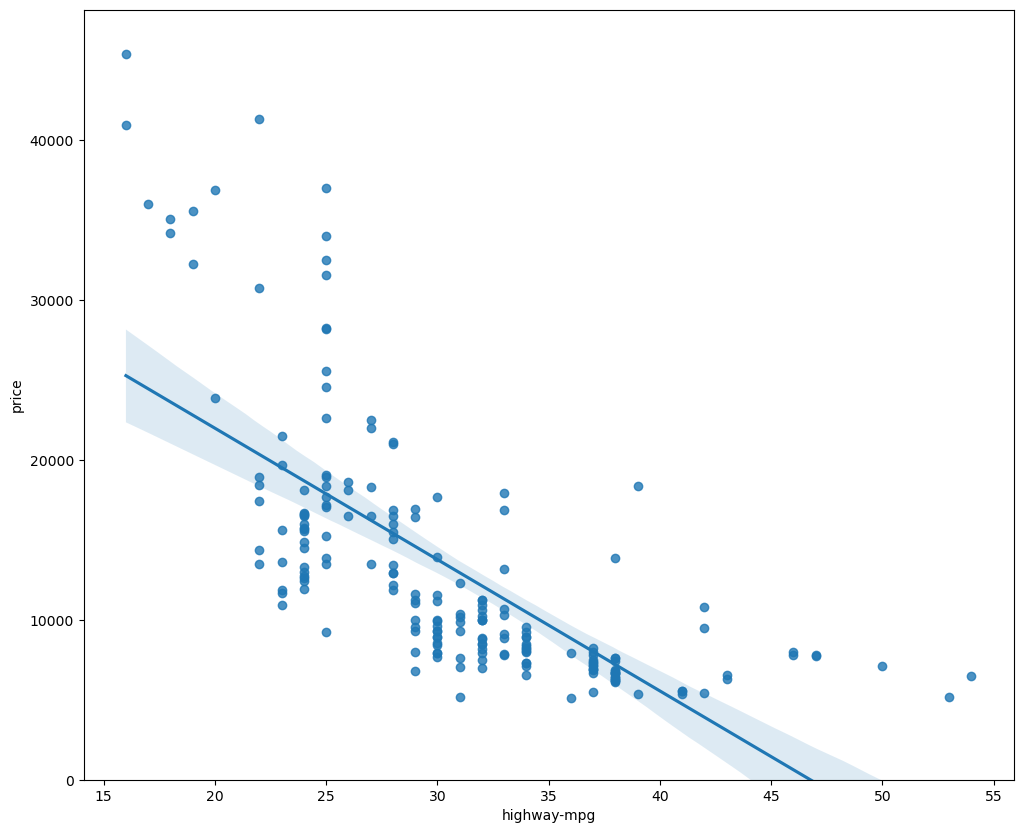

In [259]:
#visualize the highway-mpg 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

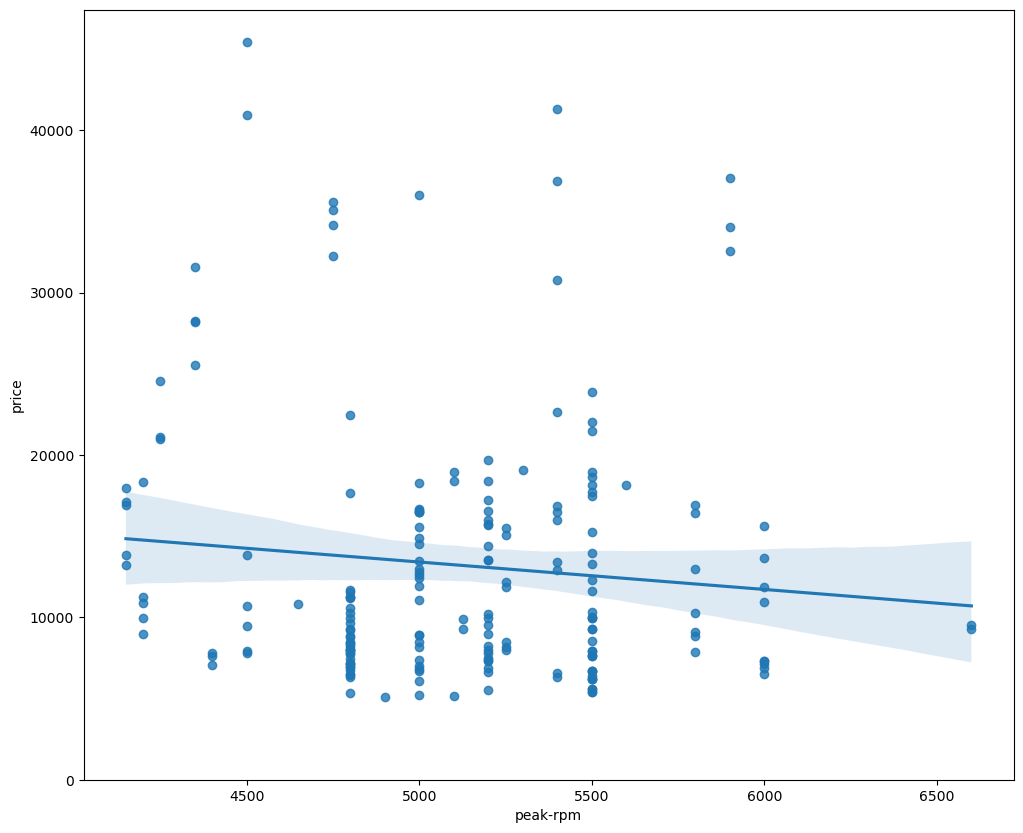

In [260]:
#Now we compare this to a plot of peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

It is clear from the visualization that the highway-mpg predictor has a stronger correlation. However, we can confirm this using the .corr method:

In [261]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot
On a residual plot, the residual is the distance beteween each point and the fitted regression line. A model is appropriate if the points are randlomly spread out around the x-axis

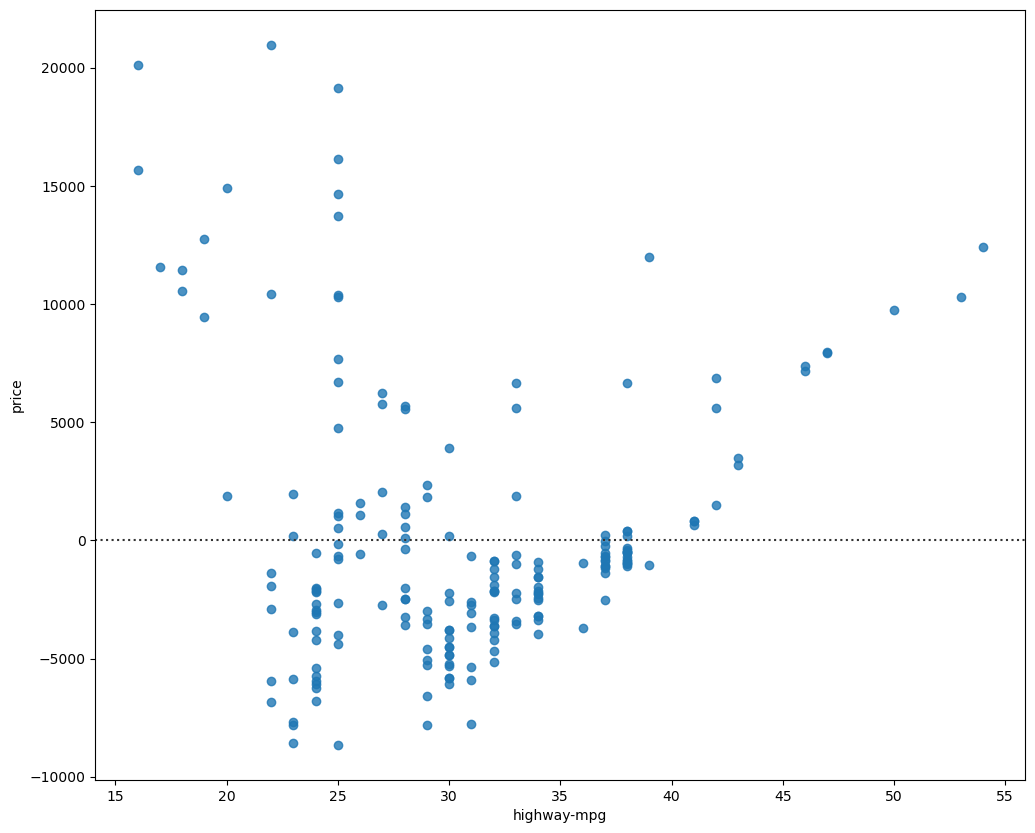

In [262]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

### Multiple linear regression
We can visualize a MLR using a distribution plot: comparing the distribution of the fitted values and distribution of actual values.

In [263]:
lm2.fit(Z, df['price'])
Y_hat = lm2.predict(Z)

C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_15668\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_15668\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

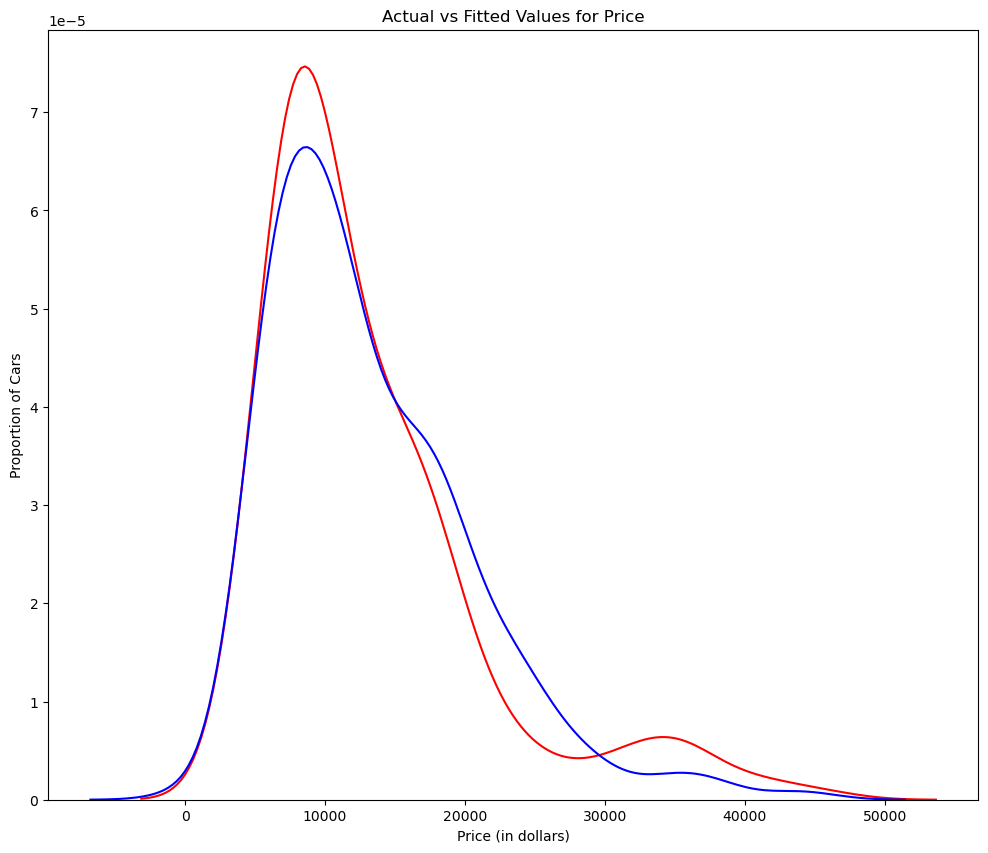

In [264]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


## Polynomial Regression and Pipelines
We get non-linear relationships by setting polynomials of higher degrees

In [265]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [285]:
x = df[['highway-mpg']]
y = df['price']

In [267]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


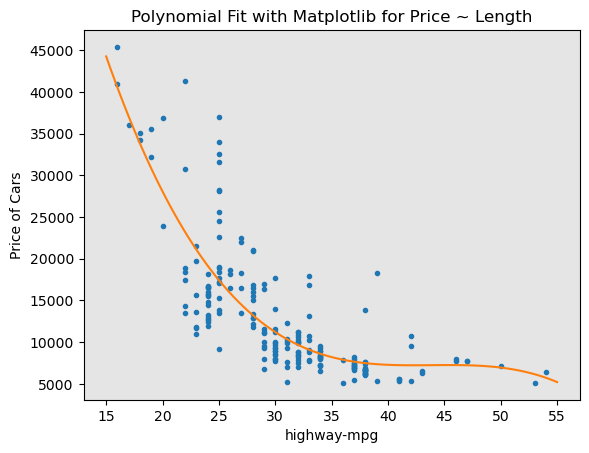

In [268]:
PlotPolly(p, x, y, 'highway-mpg')

In [269]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [270]:
# Creating a polunomial of order 11
g = np.polyfit(x, y, 11)
q = np.poly1d(g)
print(q)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


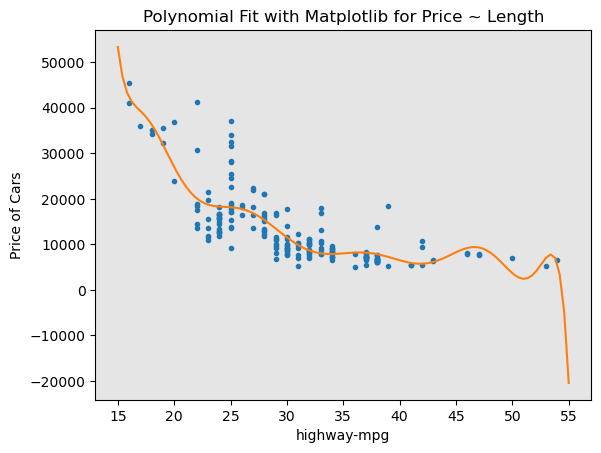

In [271]:
PlotPolly(q, x, y, 'highway-mpg')

### Multivariate Polynomial Function

In [273]:
pr=PolynomialFeatures(degree=2)

In [274]:
Z_pr=pr.fit_transform(Z)

In [275]:
Z.shape #original data

(201, 4)

In [276]:
Z_pr.shape #transformed data

(201, 15)

## Pipelines
Data pipelines simplify the process of transforming data. 
We use the modules pipeline from scikit-learn to create a pipeline and standard scaler as a step in the pipeline. We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [277]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [278]:
pipe=Pipeline(Input) #input the list of tuples as an argument to create a pipeline
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [279]:
Z = Z.astype(float) #convert the values into float because that is the default input type for standardscaleer()
pipe.fit(Z,y) #simultaneously normalize the data, perform a transform, ad fit the model

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [280]:
ypipe=pipe.predict(Z) #simultaneously normalize the data, perform a transform, and produce a prediction
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [281]:
#Create a pipeline that standardizes the data, 
#then produce a prediction using a linear regression model using the features Z and target y.

newinput = [('scale', StandardScaler()), ('model', LinearRegression())]
newpipe = Pipeline(newinput)

newpipe.fit(z,y)

ypipe = newpipe.predict(z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

## Measures for In-Sample Evaluation
Here we shall concern ourselves with quantitative measures of accuracy. There are two important measures: 
* R^2 
* Mean Squared Error

### Model 1: Simple Linear Regression
Let us calculate R^2 and MSE

In [293]:
lm.fit(x,y)
print('The R-Squared is:', lm.score(x,y))

# This means the 49.65% of the variation of price is explained by the SLM 'highway-mpg' fit

The R-Squared is: 0.4965911884339176


In [295]:
y_hat1 = lm.predict(x)
y_hat1[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [298]:
#we can compare the predicted results with the actual results
mse = mean_squared_error(df['price'], y_hat1)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

In [299]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


In [300]:
Y_predict_multifit = lm.predict(Z)


In [301]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.349818882


### Model 3: Polynomial Fit

In [305]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
#we can say 67.4% of the variation of price is explained by the polynomial fir

The R-square value is:  0.6741946663906513


In [306]:
mean_squared_error(df['price'], p(x))

20474146.42636125

# Conclusion
Comparing the three models, the MLR has a higher R^2 and lower MSE than the polynomial and SLR models and is thus the best of the three models.